IMPORTING MODULES

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random

IMPORTING DATASETS

In [2]:
train_df = pd.read_csv("C:/Users/Dell/Dropbox (Old)/My PC (DESKTOP-9I2HO18)/Downloads/mnist_train_small.csv")

In [3]:
train_df

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


FINDING NUMBER OF ROWS AND COLUMNS

In [4]:
num_col=train_df.shape[1]

In [5]:
num_row=train_df.shape[0]

CREATING ARRAY OF FEATURES

In [6]:
feat=train_df.drop(["6"],axis=1)

In [7]:
list1=np.ones(num_row, dtype = int)

In [8]:
feat.insert(loc=0, column='A', value=list1) # adding 1 to accomodate constant

In [9]:
feat

,A,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
x_train1=feat.to_numpy()

In [11]:
x_train=x_train1.astype('float64') #19999 * 785

CREATING ARRAY OF LABELS

In [12]:
label=train_df["6"]

In [13]:
label=label.to_numpy()

In [14]:
label

array([5, 7, 9, ..., 2, 9, 5], dtype=int64)

In [15]:
y_train=np.reshape(label,(1,num_row)) #creating 2-D array for matrix calculations

In [16]:
class training:
    def __init__(self,x,y,no_of_iters,learn_rate,a,b):
        self.xset=x
        self.yset=y
        self.iters=no_of_iters
        self.learn=learn_rate
        self.numrow=a
        self.numcol=b
    def train(self): #a-num_row,b-num_col 
        theta=np.zeros((1,self.numcol),dtype=float) # initializing theta
        self.predi=np.dot(theta,np.transpose(self.xset)) # initializing predicted output matrix
        for m in range(0,self.iters):
            D=np.dot((self.predi-self.yset),self.xset) # diffentiation function 
            theta1=theta 
            # updating theta
            theta=theta-((self.learn/self.numrow)*D) 
            theta[0][0]=theta1[0][0]-((self.learn/self.numrow)*np.sum(self.predi-self.yset))
            # updating predicting output matrix
            self.predi=np.dot(theta,np.transpose(self.xset))
            cost=(1/2*self.numrow)*np.sum(np.square(self.predi-self.yset))
            plt.scatter(m,cost,c="red")
        # defining a cost function 
        return(theta)
    
    
    

In [ ]:
training(x_train,y_train,3000,0.0000008,num_row,num_col).train() # training with optimum learning rate

Testing

FINDING FINAL THETA

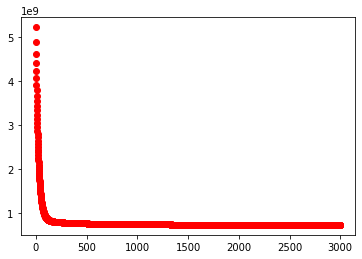

In [18]:
theta=training(x_train,y_train,3000,0.0000008,num_row,num_col).train()

TESTING

In [19]:
test_df = pd.read_csv("C:/Users/Dell/Dropbox (Old)/My PC (DESKTOP-9I2HO18)/Downloads/mnist_test.csv")

In [20]:
test_df

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


NUMBER OF ROWS AND COLUMNS

In [21]:
num_row1=test_df.shape[0]

In [22]:
num_col1=test_df.shape[1]

CREATING 2-D ARRAY OF FEATURES

In [23]:
feat1=test_df.drop(["7"],axis=1)

In [24]:
list2=np.ones(num_row1, dtype = int)

In [25]:
feat1.insert(loc=0, column='A', value=list2)

In [26]:
x_test1=feat1.to_numpy()

In [27]:
x_test=x_test1.astype('float64')

CREATING 2-D ARRAY OF LABELS

In [28]:
label1=test_df["7"]

In [29]:
label1=label1.to_numpy()

In [30]:
y_test=np.reshape((label1),(1,num_row1))

In [31]:
y_test

array([[2, 1, 0, ..., 4, 5, 6]], dtype=int64)

CALCULATING PREDICTED OUTPUT

In [32]:
predicted_output=np.dot(theta,(np.transpose(x_test)))

In [33]:
predicted_output

array([[2.02466935, 0.8368569 , 1.34269175, ..., 8.65626761, 5.48791036,
        6.79932385]])

In [34]:
cost1=(1/2*num_row1)*np.sum(np.square(predicted_output-y_test))

FINAL COST

In [35]:
cost1

178984392.98158398

ACCURACY

In [36]:
predicted_output=predicted_output.round()

In [49]:
predicted_output=predicted_output.astype(int)

In [54]:
predicted_output

array([[2, 1, 1, ..., 9, 5, 7]])

In [50]:
accu=0

In [55]:
for i in range(0,num_row1):
    if predicted_output[0][i]==y_test[0][i]:
        accu+=1
    else:
        accu=accu

In [56]:
accu=accu/num_row1
accu

0.24164832724896648

FINALLY RUNNING OUR CODE

In [73]:
'''Write the testing example for which you want output'''
n=int(input())
print("The predicted output is {}".format(predicted_output[0][n]))
print("The real value is {}".format(y_test[0][n]))


 378


The predicted output is 4.047612525396908
The real value is 4


In [74]:
'''Write the testing example for which you want output'''
n=int(input())
print("The predicted output is {}".format(predicted_output[0][n]))
print("The real value is {}".format(y_test[0][n]))

 2345


The predicted output is 4.951812204716319
The real value is 5


In [75]:
'''Write the testing example for which you want output'''
n=int(input())
print("The predicted output is {}".format(predicted_output[0][n]))
print("The real value is {}".format(y_test[0][n]))

 5678


The predicted output is 1.0298556377787873
The real value is 1
